First need to turn monthly data into quarterly data, then make it % changes. Check to see the distributions of the data, then determine how to compare it.

## NOTES
 - data of monetary base (total M0, currency, and reserves) is in millions and not seasonally adjusted 
 - Real M1/M2 money stock is in 1982-1984 dollars
 - CPI data is Sticky Price CPI less Food and Energy, YoY change, calculated monthly 
 - RGDP is billions of chained 2012 USD, seasonally adjusted at annual rate. Quarterly 
 - NASDAQ is monthly until 10/31/22
 - Velocity of Monies are quarterly 
 - all data starts, except the NASDAQ, on Jan 1, 1972 because I wanted to do after the US got off the gold reserve 

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [160]:
# import data 
commercial = pd.read_excel("/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/commercial_loan_adj.xlsx")
cpi = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/core_cpi_adj.xlsx')
fedfunds = pd.read_excel("/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/fedfunds_nadj.xlsx")
mbase = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/M0_base_nadj.xlsx')
mcurrency = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/M0_currency_nadj.xlsx')
mreserve = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/M0_reserve_nadj.xlsx')
ndq = pd.read_csv('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/nasdaq.csv')
rgdp = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/rGDP_adj.xlsx')
rm_one = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/rM1_adj.xlsx')
rm_two = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/rM2_adj.xlsx')
unemploy = pd.read_excel('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/unemploy_rate_adj.xlsx')


## Monthly Data
Cleaning data that is collected monthly, then converting it to quarterly data <br>
Monthly data: commercial, cpi, fedfunds, mbase, mcurrency, mreserve, ndq, rm_one, unemploy 

In [134]:
# inspect data 
commercial.head(20)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,BUSLOANS,"Commercial and Industrial Loans, All Commercia..."
7,NaN,NaN
8,Frequency: Monthly,NaN
9,observation_date,BUSLOANS


In [135]:
# all data besides ndq
#create function to clean them all at once 

def clean(file):
    file = file.iloc[10:]
    file = file.rename(columns={'FRED Graph Observations': 'Date', 'Unnamed: 1': 'Data'})
    file.index = file["Date"]
    file = file.drop(columns=["Date"])
    file.index = pd.to_datetime(file.index)
    return file 

In [161]:
commercial = clean(commercial)
cpi = clean(cpi)    
fedfunds = clean(fedfunds)
mbase = clean(mbase)
mcurrency = clean(mcurrency)
mreserve = clean(mreserve)
rgdp = clean(rgdp)
rm_one = clean(rm_one)
rm_two = clean(rm_two)
unemploy = clean(unemploy)

In [137]:
mbase.head()

,Data
Date,
1972-01-01,87200
1972-02-01,86100
1972-03-01,86700
1972-04-01,87900
1972-05-01,88500


In [162]:
# name all cols with the data the name of the data to prep for concat
commercial.rename(columns = {'Data': 'commercial'}, inplace=True)
cpi.rename(columns = {'Data': 'cpi'}, inplace=True)
fedfunds.rename(columns = {'Data':"fedfunds"}, inplace=True)
mbase.rename(columns = {'Data':'mbase'}, inplace=True)
mcurrency.rename(columns ={'Data':'mcurrency'}, inplace=True)   
mreserve.rename(columns ={'Data':'mreserve'}, inplace=True)
rm_one.rename(columns ={'Data':'rm_one'}, inplace = True)
rm_two.rename(columns ={'Data':"rm_two"}, inplace=True)
unemploy.rename(columns ={'Data':'unemploy'}, inplace=True)

In [163]:
commercial.head()

,commercial
Date,
1972-01-01,118.1645
1972-02-01,118.8982
1972-03-01,119.691
1972-04-01,121.2319
1972-05-01,122.692


In [164]:
cpi.head()

,cpi
Date,
1972-01-01,3.755946
1972-02-01,3.864644
1972-03-01,4.07858
1972-04-01,3.991016
1972-05-01,3.880713


In [165]:
# now clean ndq
# keep close as the price 
# only goes up to 1985
ndq.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
ndq.index = ndq['Date']
ndq = ndq.drop(columns=['Date'])
ndq.rename(columns={'Close':'ndq'}, inplace=True)
ndq.index = pd.to_datetime(ndq.index)
ndq

,ndq
Date,
1985-01-01,278.700012
1985-02-01,284.200012
1985-03-01,279.200012
1985-04-01,280.600006
1985-05-01,290.799988
...,...
2022-06-01,11028.740234
2022-07-01,12390.690430
2022-08-01,11816.200195


In [166]:
#Resampling to make data quarterly. This method takes average of the quarter 
def quarterly(file):
    file = file.resample('Q').mean()
    return file

In [167]:
# exclide velocity and gdp data because that is already quarterly 
commercial = quarterly(commercial)
cpi = quarterly(cpi)
fedfunds = quarterly(fedfunds)
mbase = quarterly(mbase)
mcurrency = quarterly(mcurrency)
mreserve = quarterly(mreserve)
ndq = quarterly(ndq)
rgdp = quarterly(rgdp)
rm_one = quarterly(rm_one)
rm_two = quarterly(rm_two)
unemploy = quarterly(unemploy)
ndq = quarterly(ndq)

In [168]:
single_dfs = [commercial, cpi, fedfunds, mbase, mcurrency, mreserve, rm_two, rm_one, unemploy, ndq]
result = pd.concat(single_dfs, axis=1)

In [169]:
result.head()

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq
Date,,,,,,,,,,
1972-03-31,118.917900,3.899723,3.546667,86666.666667,60000.000000,26633.333333,1755.533333,NaN,5.766667,NaN
1972-06-30,122.563700,3.791990,4.300000,88433.333333,61266.666667,27200.000000,1787.966667,NaN,5.700000,NaN
1972-09-30,125.882467,3.333424,4.743333,90133.333333,62766.666667,27366.666667,1833.433333,NaN,5.566667,NaN
1972-12-31,131.263400,3.259741,5.146667,91100.000000,64666.666667,26466.666667,1874.966667,NaN,5.366667,NaN
1973-03-31,140.389800,2.889478,6.536667,91033.333333,65000.000000,26033.333333,1889.866667,585.166667,4.933333,NaN


## Quarterly Data

In [178]:
vm_one = pd.read_csv('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/M1V.csv')
vm_two = pd.read_csv('/Users/gavmross/Desktop/School/cua_fall_22/finance/money_banking/data/M2V.csv')

In [175]:
vm_one.head()

,DATE,M1V
0,1972-01-01,5.299
1,1972-04-01,5.365
2,1972-07-01,5.356
3,1972-10-01,5.383
4,1973-01-01,5.471


In [176]:
rgdp.head()

,Data
Date,
1972-03-31,5249.337
1972-06-30,5368.485
1972-09-30,5419.184
1972-12-31,5509.926
1973-03-31,5646.286


In [179]:
vm_one.index = vm_one['DATE']
vm_one.drop(columns=['DATE'], inplace=True)
vm_one.rename(columns={'M1V':'vm1'}, inplace=True)
vm_one.index = pd.to_datetime(vm_one.index)
vm_one = vm_one.resample('Q').mean()
vm_one

,vm1
DATE,
1972-03-31,5.299
1972-06-30,5.365
1972-09-30,5.356
1972-12-31,5.383
1973-03-31,5.471
...,...
2021-09-30,1.196
2021-12-31,1.202
2022-03-31,1.198


In [180]:
vm_two.index = vm_two['DATE']
vm_two.drop(columns=['DATE'], inplace=True)
vm_two.rename(columns={'M2V':'vm2'}, inplace=True)
vm_two.index = pd.to_datetime(vm_two.index)
vm_two = vm_two.resample('Q').mean()
vm_two.head()

,vm2
DATE,
1972-03-31,1.696
1972-06-30,1.703
1972-09-30,1.679
1972-12-31,1.673
1973-03-31,1.694


In [181]:
# rgdp was put through clean() function, just need to rename the Data col
rgdp.rename(columns={'Data':'rgdp'}, inplace=True)
rgdp

,rgdp
Date,
1972-03-31,5249.337
1972-06-30,5368.485
1972-09-30,5419.184
1972-12-31,5509.926
1973-03-31,5646.286
...,...
2021-09-30,19672.594
2021-12-31,20006.181
2022-03-31,19924.088


In [182]:
# concat all the quarterly data to the result df
result2 = pd.concat([result, vm_one, vm_two, rgdp], axis=1)
result2

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
1972-03-31,118.917900,3.899723,3.546667,8.666667e+04,6.000000e+04,2.663333e+04,1755.533333,NaN,5.766667,NaN,5.299,1.696,5249.337
1972-06-30,122.563700,3.791990,4.300000,8.843333e+04,6.126667e+04,2.720000e+04,1787.966667,NaN,5.700000,NaN,5.365,1.703,5368.485
1972-09-30,125.882467,3.333424,4.743333,9.013333e+04,6.276667e+04,2.736667e+04,1833.433333,NaN,5.566667,NaN,5.356,1.679,5419.184
1972-12-31,131.263400,3.259741,5.146667,9.110000e+04,6.466667e+04,2.646667e+04,1874.966667,NaN,5.366667,NaN,5.383,1.673,5509.926
1973-03-31,140.389800,2.889478,6.536667,9.103333e+04,6.500000e+04,2.603333e+04,1889.866667,585.166667,4.933333,NaN,5.471,1.694,5646.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2437.894633,3.238340,0.080000,6.379567e+06,2.214000e+06,4.165533e+06,7660.400000,7276.133333,4.233333,15560.349935,1.202,1.142,20006.181
2022-03-31,2502.280833,4.277553,0.120000,6.092800e+06,2.242667e+06,3.850100e+06,7624.700000,7255.500000,3.800000,14070.599935,1.198,1.140,19924.088
2022-06-30,2607.515700,5.041692,0.770000,5.661067e+06,2.273867e+06,3.387233e+06,7414.033333,7060.033333,3.600000,11814.923177,1.226,1.167,19895.271
2022-09-30,2721.242800,6.004582,2.190000,5.510133e+06,2.278100e+06,3.232000e+06,7297.066667,6904.700000,3.566667,11594.170247,1.258,1.190,20039.406


Need to adjust real money stocks from 1982 to today. Need to adjust mbase, mcurrency, mreserve to billions (?) <br>
$100 in 1980 equals 361.67 today, an increase on 3.62 times <br>
To go from millions to billions, multiply by one thousand

In [268]:
result2['rm_one'] *= 3.62
result2['rm_two'] *= 3.62
result2[['mbase', 'mcurrency', 'mreserve']] *= 1000
result2

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
1972-03-31,118.917900,3.899723,3.546667,8.666667e+07,6.000000e+07,2.663333e+07,6355.030667,NaN,5.766667,NaN,5.299,1.696,5249.337
1972-06-30,122.563700,3.791990,4.300000,8.843333e+07,6.126667e+07,2.720000e+07,6472.439333,NaN,5.700000,NaN,5.365,1.703,5368.485
1972-09-30,125.882467,3.333424,4.743333,9.013333e+07,6.276667e+07,2.736667e+07,6637.028667,NaN,5.566667,NaN,5.356,1.679,5419.184
1972-12-31,131.263400,3.259741,5.146667,9.110000e+07,6.466667e+07,2.646667e+07,6787.379333,NaN,5.366667,NaN,5.383,1.673,5509.926
1973-03-31,140.389800,2.889478,6.536667,9.103333e+07,6.500000e+07,2.603333e+07,6841.317333,2118.303333,4.933333,NaN,5.471,1.694,5646.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2437.894633,3.238340,0.080000,6.379567e+09,2.214000e+09,4.165533e+09,27730.648000,26339.602667,4.233333,15560.349935,1.202,1.142,20006.181
2022-03-31,2502.280833,4.277553,0.120000,6.092800e+09,2.242667e+09,3.850100e+09,27601.414000,26264.910000,3.800000,14070.599935,1.198,1.140,19924.088
2022-06-30,2607.515700,5.041692,0.770000,5.661067e+09,2.273867e+09,3.387233e+09,26838.800667,25557.320667,3.600000,11814.923177,1.226,1.167,19895.271
2022-09-30,2721.242800,6.004582,2.190000,5.510133e+09,2.278100e+09,3.232000e+09,26415.381333,24995.014000,3.566667,11594.170247,1.258,1.190,20039.406


## Creating percent changes from quarter to quarter
this will standardize the data and make it easier to compare 

In [269]:
percent_change = result2.apply(pd.Series.pct_change)
percent_change.head(20)


,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
1972-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-30,0.030658,-0.027626,0.212406,0.020385,0.021111,0.021277,0.018475,NaN,-0.011561,NaN,0.012455,0.004127,0.022698
1972-09-30,0.027078,-0.120930,0.103101,0.019224,0.024483,0.006127,0.025429,NaN,-0.023392,NaN,-0.001678,-0.014093,0.009444
1972-12-31,0.042746,-0.022104,0.085032,0.010725,0.030271,-0.032887,0.022653,NaN,-0.035928,NaN,0.005041,-0.003574,0.016745
1973-03-31,0.069527,-0.113586,0.270078,-0.000732,0.005155,-0.016373,0.007947,NaN,-0.080745,NaN,0.016348,0.012552,0.024748
1973-06-30,0.069236,0.075345,0.195818,0.023068,0.027692,0.011524,-0.004445,-0.009000,0.000000,NaN,0.014440,0.009445,0.010887
1973-09-30,0.047908,0.104994,0.350959,0.029349,0.024950,0.040506,-0.005492,-0.007932,-0.027027,NaN,0.002523,0.000585,-0.005259
1973-12-31,0.017826,0.459588,-0.053346,0.028860,0.025316,0.040146,-0.012185,-0.012457,-0.006944,NaN,0.016715,0.016365,0.009492
1974-03-31,0.033926,0.263315,-0.067356,0.010814,0.009022,0.011696,-0.010929,-0.012849,0.076923,NaN,-0.006187,-0.008051,-0.008598
1974-06-30,0.072730,0.237852,0.206650,0.030090,0.030118,0.032370,-0.014332,-0.016880,0.012987,NaN,0.016364,0.013333,0.002377


## Plotting the data

Text(0, 0.5, 'Percent Change')

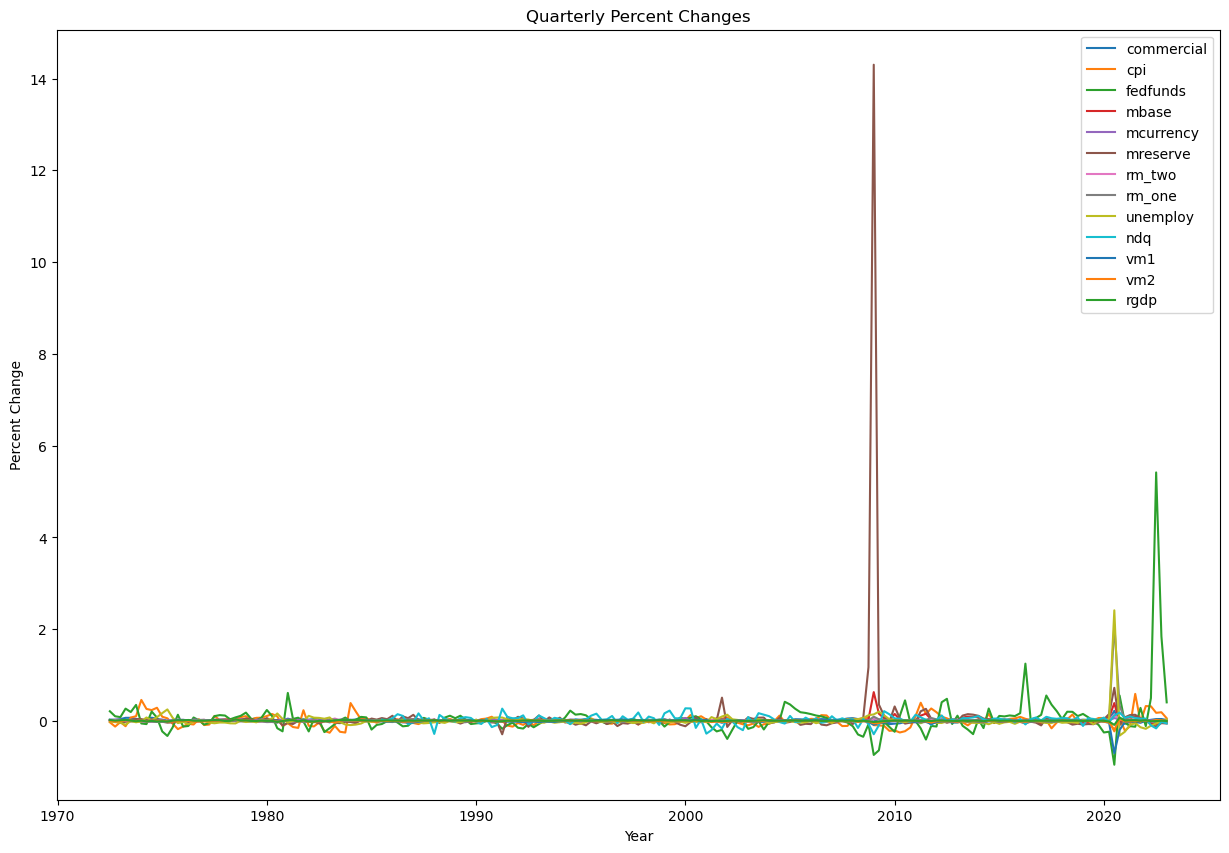

In [270]:
plt.figure(figsize=(15,10))
plt.plot(percent_change, label=percent_change.columns)
plt.legend()
plt.title('Quarterly Percent Changes')
plt.xlabel('Year')
plt.ylabel('Percent Change')



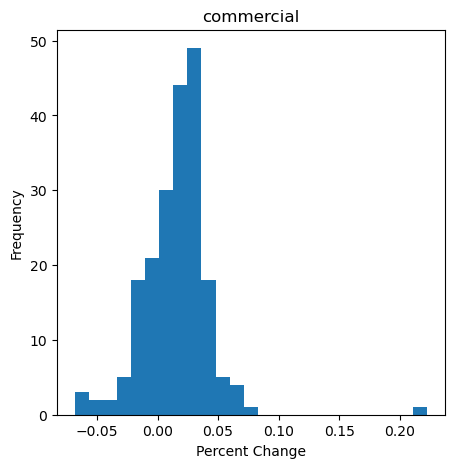

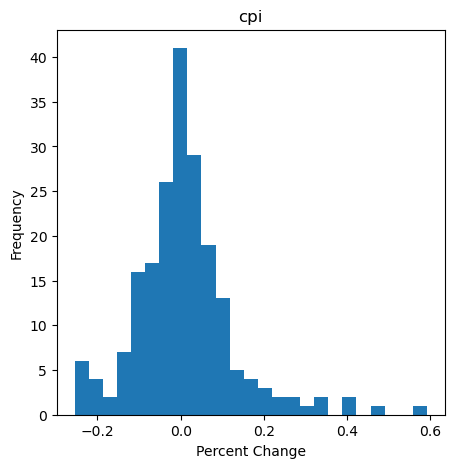

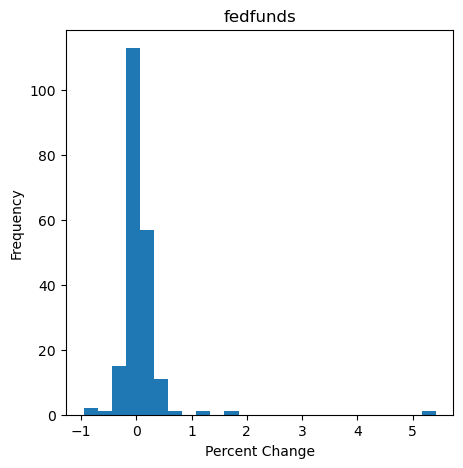

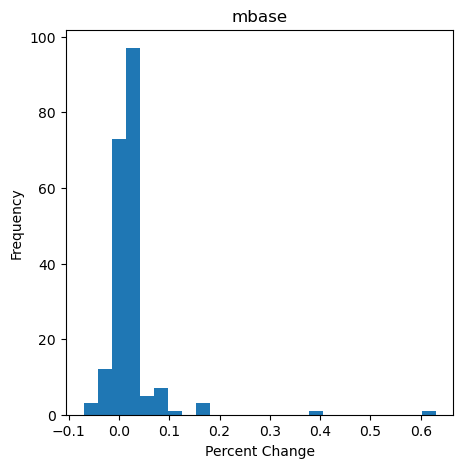

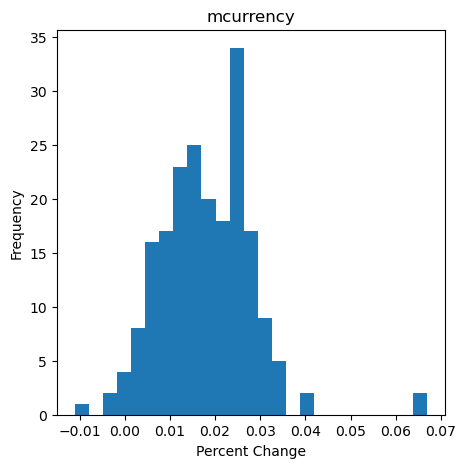

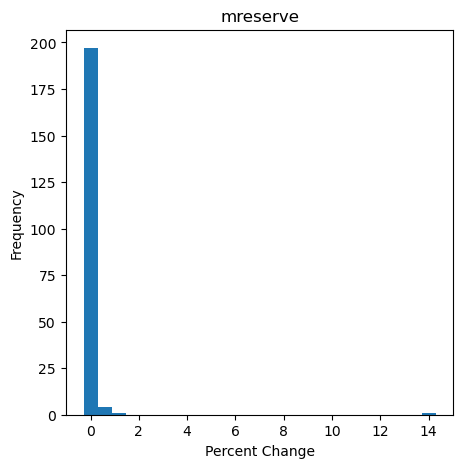

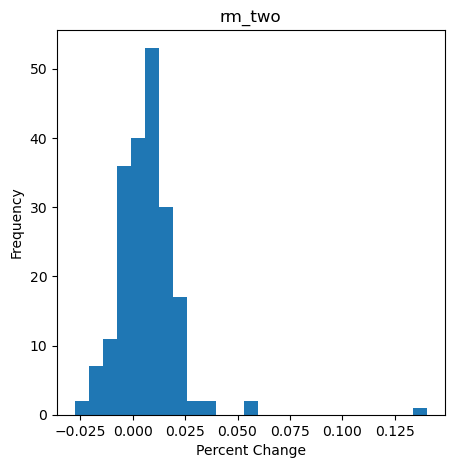

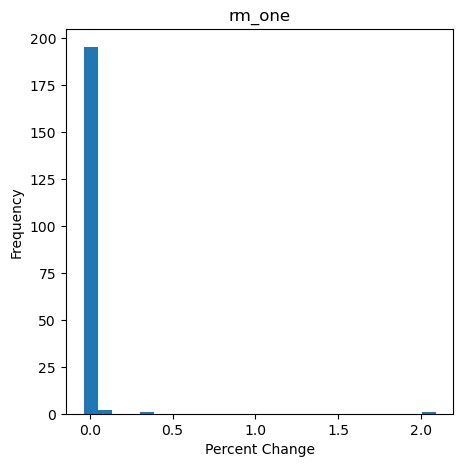

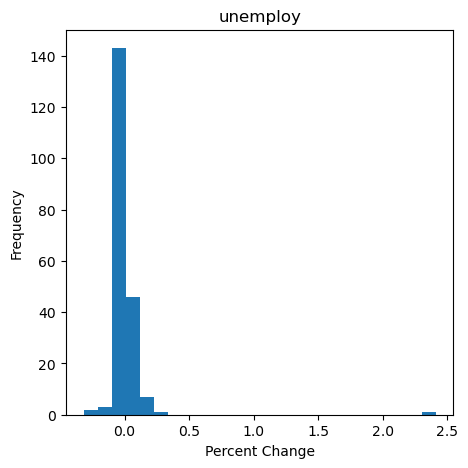

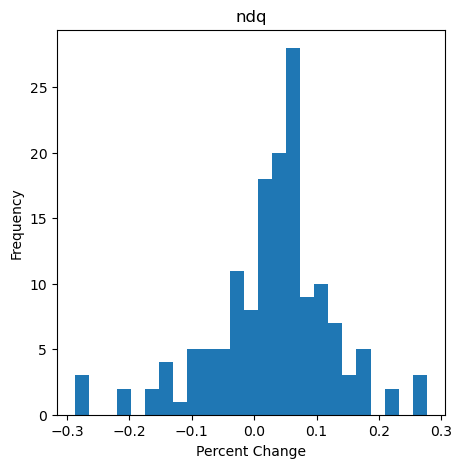

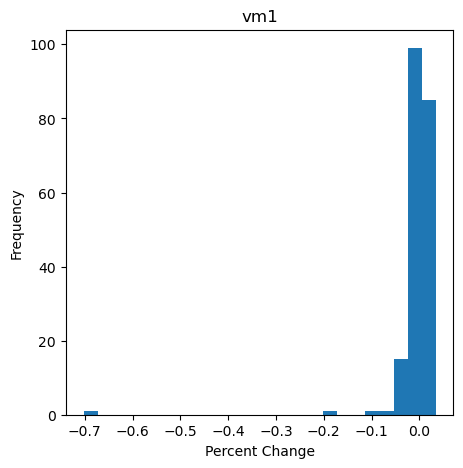

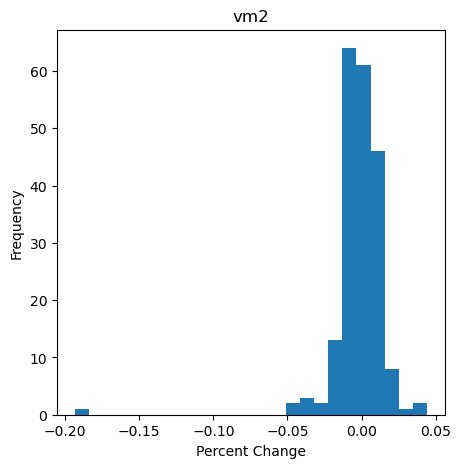

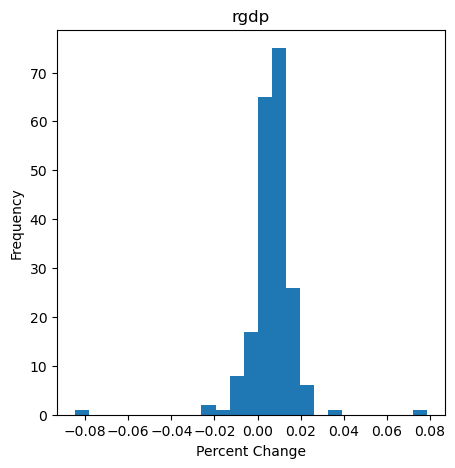

In [271]:
for i in percent_change.columns:
    plt.figure(figsize=(5,5))
    plt.hist(percent_change[i], bins=25)
    plt.title(i)
    plt.xlabel('Percent Change')
    plt.ylabel('Frequency')

array([[<AxesSubplot:title={'center':'commercial'}>,
        <AxesSubplot:title={'center':'cpi'}>,
        <AxesSubplot:title={'center':'fedfunds'}>,
        <AxesSubplot:title={'center':'mbase'}>],
       [<AxesSubplot:title={'center':'mcurrency'}>,
        <AxesSubplot:title={'center':'mreserve'}>,
        <AxesSubplot:title={'center':'rm_two'}>,
        <AxesSubplot:title={'center':'rm_one'}>],
       [<AxesSubplot:title={'center':'unemploy'}>,
        <AxesSubplot:title={'center':'ndq'}>,
        <AxesSubplot:title={'center':'vm1'}>,
        <AxesSubplot:title={'center':'vm2'}>],
       [<AxesSubplot:title={'center':'rgdp'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

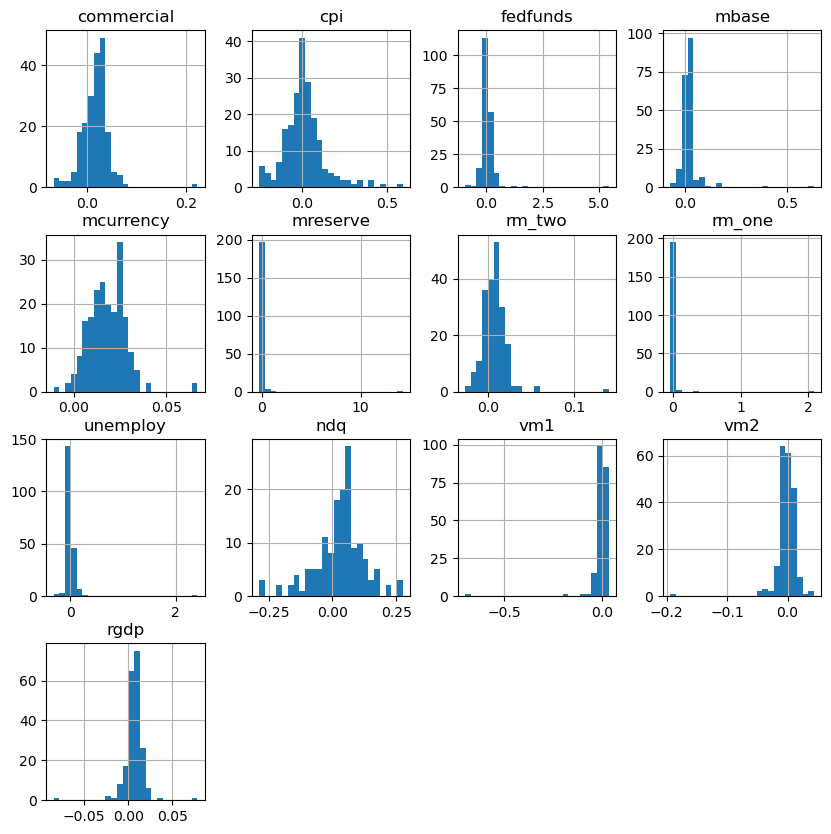

In [272]:
percent_change.hist(layout=(4,4), bins=25, figsize=(10,10))


commercial       AxesSubplot(0.125,0.712609;0.168478x0.167391)
cpi           AxesSubplot(0.327174,0.712609;0.168478x0.167391)
fedfunds      AxesSubplot(0.529348,0.712609;0.168478x0.167391)
mbase         AxesSubplot(0.731522,0.712609;0.168478x0.167391)
mcurrency        AxesSubplot(0.125,0.511739;0.168478x0.167391)
mreserve      AxesSubplot(0.327174,0.511739;0.168478x0.167391)
rm_two        AxesSubplot(0.529348,0.511739;0.168478x0.167391)
rm_one        AxesSubplot(0.731522,0.511739;0.168478x0.167391)
unemploy          AxesSubplot(0.125,0.31087;0.168478x0.167391)
ndq            AxesSubplot(0.327174,0.31087;0.168478x0.167391)
vm1            AxesSubplot(0.529348,0.31087;0.168478x0.167391)
vm2            AxesSubplot(0.731522,0.31087;0.168478x0.167391)
rgdp                 AxesSubplot(0.125,0.11;0.168478x0.167391)
dtype: object

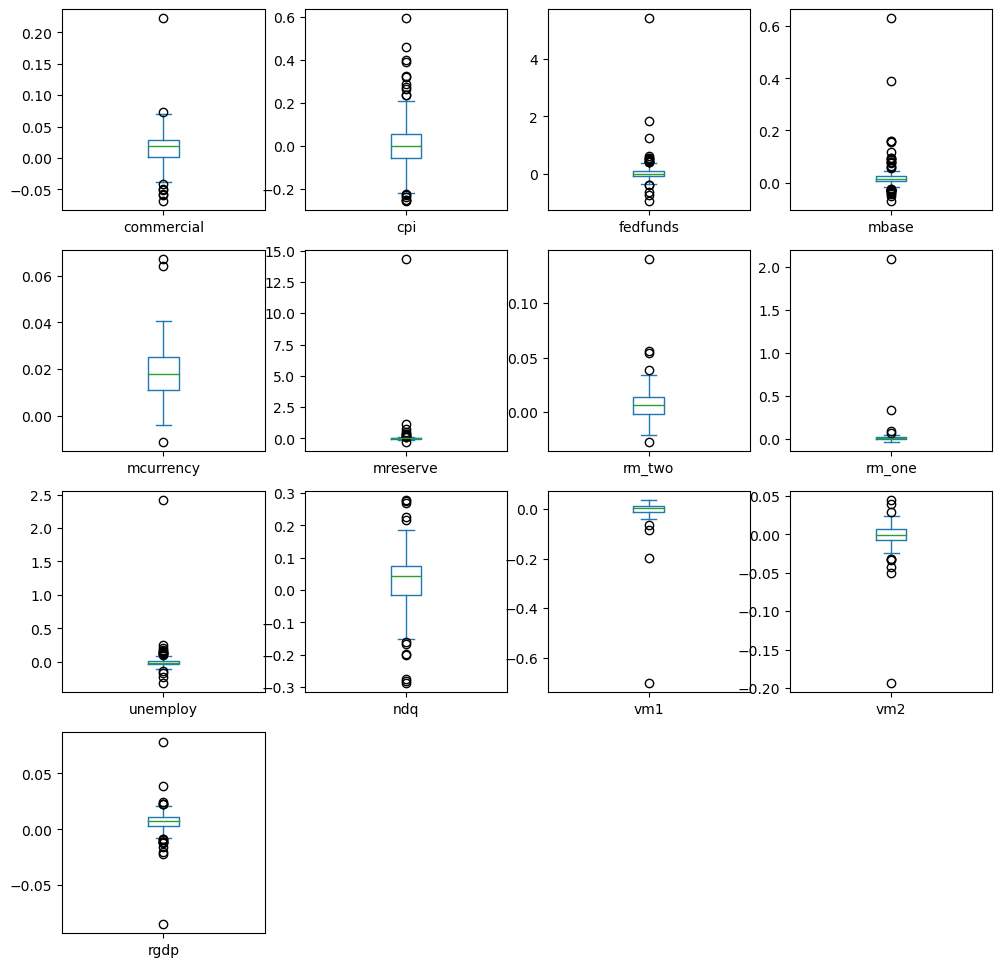

In [273]:
percent_change.plot.box(layout=(4,4), figsize=(12,12), subplots=True)

## Correlations and Statistics 

In [274]:
corr_matrix = percent_change.corr()
corr_matrix

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
commercial,1.000000,0.182112,0.076664,0.180987,0.134584,0.060496,0.201380,0.469369,0.501450,-0.069502,-0.366537,-0.349288,-0.370395
cpi,0.182112,1.000000,0.169055,-0.105536,-0.000320,-0.060948,-0.284748,-0.154474,-0.151172,-0.132646,0.146905,0.179254,0.044954
fedfunds,0.076664,0.169055,1.000000,-0.350128,-0.101762,-0.151115,-0.333786,-0.169056,-0.231608,-0.139574,0.198885,0.335109,0.158780
mbase,0.180987,-0.105536,-0.350128,1.000000,0.413841,0.782695,0.509479,0.473703,0.485072,-0.123073,-0.513601,-0.545691,-0.423614
mcurrency,0.134584,-0.000320,-0.101762,0.413841,1.000000,0.167474,0.266621,0.364559,0.286627,0.054223,-0.378926,-0.200914,-0.078892
mreserve,0.060496,-0.060948,-0.151115,0.782695,0.167474,1.000000,0.268485,0.087380,0.108193,-0.277318,-0.158464,-0.241461,-0.218666
rm_two,0.201380,-0.284748,-0.333786,0.509479,0.266621,0.268485,1.000000,0.696570,0.569213,0.044283,-0.714891,-0.808606,-0.279761
rm_one,0.469369,-0.154474,-0.169056,0.473703,0.364559,0.087380,0.696570,1.000000,0.904794,0.095770,-0.968630,-0.749628,-0.499815
unemploy,0.501450,-0.151172,-0.231608,0.485072,0.286627,0.108193,0.569213,0.904794,1.000000,0.015617,-0.851579,-0.804065,-0.720486
ndq,-0.069502,-0.132646,-0.139574,-0.123073,0.054223,-0.277318,0.044283,0.095770,0.015617,1.000000,-0.083658,0.057501,0.175520


<AxesSubplot:>

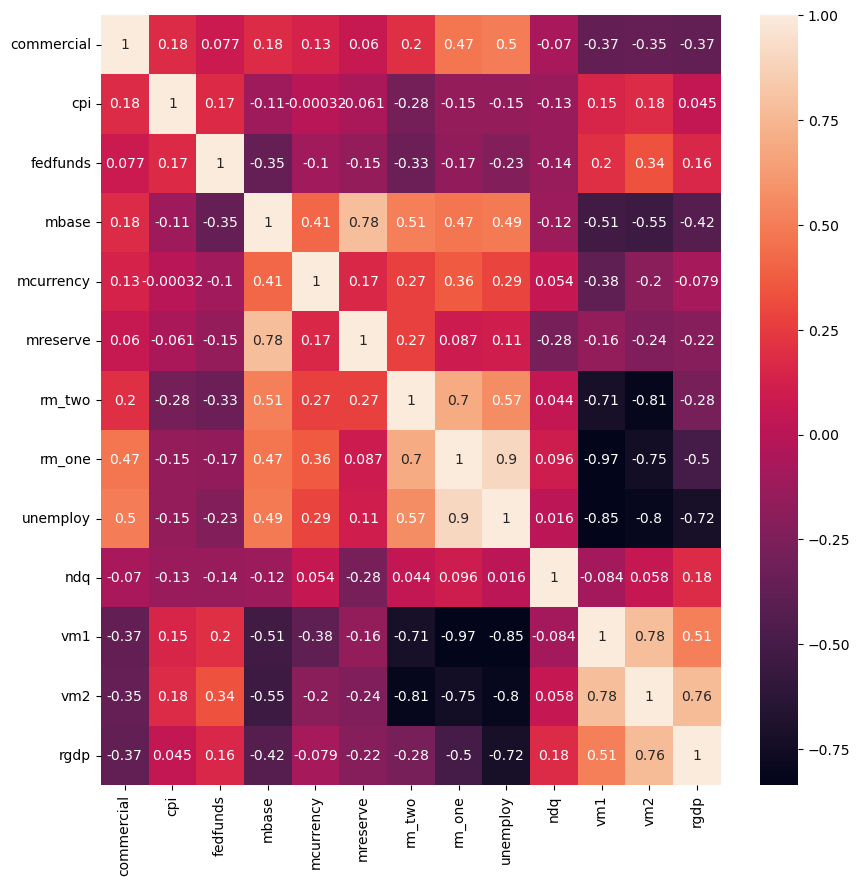

In [278]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, robust=True) # robust uses strict instead of extreme@

In [335]:
summary = percent_change.describe()
summary

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,199.000000,203.000000,151.000000,203.000000,203.000000,203.000000
mean,0.016015,0.009152,0.051265,0.021847,0.018140,0.086147,0.007074,0.017513,0.005493,0.029333,-0.004317,-0.001569,0.006685
std,0.027674,0.120227,0.452405,0.058361,0.010190,1.010338,0.015013,0.150541,0.179939,0.096519,0.053888,0.018001,0.011316
min,-0.068380,-0.254837,-0.952381,-0.070860,-0.011115,-0.289500,-0.027630,-0.038214,-0.318766,-0.287607,-0.702523,-0.193619,-0.084843
25%,0.001373,-0.053705,-0.073945,0.004769,0.011065,-0.034525,-0.001589,-0.006124,-0.034241,-0.016376,-0.010125,-0.006897,0.003168
50%,0.019845,0.001482,0.002817,0.015440,0.018161,-0.005031,0.006606,0.003771,-0.013072,0.041844,0.002523,-0.000685,0.007220
75%,0.029064,0.054204,0.107033,0.025179,0.025276,0.037548,0.013415,0.016500,0.014012,0.075626,0.011913,0.006724,0.010734
max,0.222334,0.591647,5.416667,0.630035,0.066915,14.300557,0.140227,2.090293,2.412281,0.276699,0.034469,0.044065,0.078545


In [339]:
# highest standard deviations 
summary.loc['std'].sort_values(ascending=False)

mreserve      1.010338
fedfunds      0.452405
unemploy      0.179939
rm_one        0.150541
cpi           0.120227
ndq           0.096519
mbase         0.058361
vm1           0.053888
commercial    0.027674
vm2           0.018001
rm_two        0.015013
rgdp          0.011316
mcurrency     0.010190
Name: std, dtype: float64

In [316]:
# rank the input correlation matrix, then return dictionary with k,v = index, most correlated 
def most_correlated(df):
    ranked = df.rank(ascending=False)
    most_correlated = {}
    for i, row in ranked.iterrows():
        for j, col in ranked.items():
            if ranked.loc[i, j] == 2.0 or ranked.loc[i,j] == 3.0:
                if i in most_correlated:
                    most_correlated[i].append(j)
                else:
                    most_correlated[i] = [j]
    return most_correlated
most_correlated(corr_matrix)

{'commercial': ['cpi'],
 'mbase': ['mcurrency', 'mreserve'],
 'mreserve': ['mbase'],
 'rm_two': ['mbase', 'mreserve', 'rm_one', 'unemploy'],
 'rm_one': ['commercial', 'mcurrency', 'rm_two', 'unemploy', 'ndq'],
 'unemploy': ['commercial', 'rm_two', 'rm_one'],
 'vm1': ['fedfunds', 'vm2', 'rgdp'],
 'vm2': ['cpi', 'fedfunds', 'vm1', 'rgdp'],
 'rgdp': ['ndq', 'vm1', 'vm2']}

### Data Analysis Seperated by Dates
Look at 1972-2006, 2007-2018, 2019-present


In [326]:
percent_change.head()

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
1972-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-30,0.030658,-0.027626,0.212406,0.020385,0.021111,0.021277,0.018475,NaN,-0.011561,NaN,0.012455,0.004127,0.022698
1972-09-30,0.027078,-0.120930,0.103101,0.019224,0.024483,0.006127,0.025429,NaN,-0.023392,NaN,-0.001678,-0.014093,0.009444
1972-12-31,0.042746,-0.022104,0.085032,0.010725,0.030271,-0.032887,0.022653,NaN,-0.035928,NaN,0.005041,-0.003574,0.016745
1973-03-31,0.069527,-0.113586,0.270078,-0.000732,0.005155,-0.016373,0.007947,NaN,-0.080745,NaN,0.016348,0.012552,0.024748


In [325]:
pre_2007 = percent_change.loc[:'2006-12-31']
pre_2007.head()

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
1972-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-30,0.030658,-0.027626,0.212406,0.020385,0.021111,0.021277,0.018475,NaN,-0.011561,NaN,0.012455,0.004127,0.022698
1972-09-30,0.027078,-0.120930,0.103101,0.019224,0.024483,0.006127,0.025429,NaN,-0.023392,NaN,-0.001678,-0.014093,0.009444
1972-12-31,0.042746,-0.022104,0.085032,0.010725,0.030271,-0.032887,0.022653,NaN,-0.035928,NaN,0.005041,-0.003574,0.016745
1973-03-31,0.069527,-0.113586,0.270078,-0.000732,0.005155,-0.016373,0.007947,NaN,-0.080745,NaN,0.016348,0.012552,0.024748


In [327]:
after_2007 = percent_change.loc['2007-03-31': '2018-12-31']
after_2007.head()

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
2007-03-31,0.028267,-0.015397,0.001906,0.004321,0.005027,-0.030238,0.004413,-0.011230,0.015038,0.012192,0.014141,-0.002003,0.002936
2007-06-30,0.033632,-0.109989,-0.001268,0.004870,0.004175,0.037862,0.005511,-0.005031,0.000000,0.059044,0.006731,-0.003512,0.006384
2007-09-30,0.054806,-0.106620,-0.033651,0.004039,0.003458,0.038627,0.009327,-0.007060,0.037037,0.014392,0.012036,-0.004532,0.006023
2007-12-31,0.062647,0.051471,-0.113666,0.005873,0.007261,-0.066116,-0.001675,-0.011900,0.028571,0.041844,0.010193,0.000000,0.006096
2008-03-31,0.041694,0.022857,-0.293551,-0.002959,-0.003706,0.035398,0.007937,-0.005460,0.041667,-0.150742,-0.005980,-0.019221,-0.004074


In [328]:
present = percent_change.loc['2019-03-31':]
present.head()

,commercial,cpi,fedfunds,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,ndq,vm1,vm2,rgdp
2019-03-31,0.024256,-0.026587,0.082583,-0.030391,0.006861,-0.066305,0.011239,0.002415,0.008696,0.059792,0.004482,-0.004115,0.005427
2019-06-30,0.000845,0.013443,-0.002774,-0.027366,0.012305,-0.068527,0.003962,0.003760,-0.068966,0.044855,0.000714,0.000689,0.006730
2019-09-30,0.011421,0.065667,-0.086231,-0.007302,0.011694,-0.028720,0.015150,0.016754,0.009259,0.024745,-0.008204,-0.006882,0.008900
2019-12-31,0.002800,0.064950,-0.249619,0.026761,0.017813,0.037235,0.015153,0.018066,-0.009174,0.074274,-0.015824,-0.012474,0.004430
2020-03-31,0.023931,0.002817,-0.233266,0.078570,0.014718,0.152255,0.021576,0.027040,0.055556,-0.019746,-0.036908,-0.032281,-0.011752


In [340]:
# highest standard deviations 
pre_2007.describe().loc['std'].sort_values(ascending=False)

fedfunds      0.138313
ndq           0.106896
cpi           0.103364
mreserve      0.070760
unemploy      0.050270
commercial    0.020821
rm_one        0.014710
vm1           0.014117
rm_two        0.011187
mbase         0.010915
vm2           0.010615
mcurrency     0.010033
rgdp          0.008168
Name: std, dtype: float64

In [341]:
after_2007.describe().loc['std'].sort_values(ascending=False)

mreserve      2.064949
fedfunds      0.310827
cpi           0.122793
mbase         0.101149
ndq           0.080824
unemploy      0.055093
commercial    0.026768
rm_one        0.018862
vm1           0.018728
vm2           0.011519
rm_two        0.010804
mcurrency     0.008004
rgdp          0.006069
Name: std, dtype: float64

In [342]:
present.describe().loc['std'].sort_values(ascending=False)

fedfunds      1.446853
unemploy      0.629858
rm_one        0.522114
cpi           0.208300
mreserve      0.199709
vm1           0.178631
mbase         0.108708
ndq           0.084447
commercial    0.063734
vm2           0.051604
rm_two        0.036956
rgdp          0.030934
mcurrency     0.015765
Name: std, dtype: float64

In [321]:
pre_2007_matrix = pre_2007.corr()
after_2007_matrix = after_2007.corr()
present_matrix = present.corr()

In [322]:
corrs_pre2007 = most_correlated(pre_2007_matrix)
corrs_post2007 = most_correlated(after_2007_matrix)
corrs_present = most_correlated(present_matrix)
print(corrs_pre2007)
print(corrs_post2007)
print(corrs_present)


{'commercial': ['cpi', 'fedfunds'], 'cpi': ['unemploy'], 'fedfunds': ['commercial'], 'mbase': ['mcurrency', 'mreserve'], 'mcurrency': ['mbase'], 'mreserve': ['mbase', 'rm_one', 'unemploy'], 'rm_two': ['rm_one'], 'rm_one': ['mreserve', 'rm_two', 'ndq'], 'vm1': ['commercial', 'cpi', 'vm2', 'rgdp'], 'vm2': ['fedfunds', 'mcurrency', 'vm1', 'rgdp'], 'rgdp': ['rm_two', 'ndq', 'vm1', 'vm2']}
{'commercial': ['cpi'], 'cpi': ['commercial'], 'mbase': ['mreserve', 'unemploy'], 'mcurrency': ['cpi', 'rm_one'], 'mreserve': ['mbase', 'rm_two', 'unemploy'], 'rm_two': ['commercial', 'mcurrency', 'mreserve', 'rm_one'], 'rm_one': ['mbase', 'mcurrency', 'rm_two'], 'vm1': ['vm2', 'rgdp'], 'vm2': ['fedfunds', 'ndq', 'vm1', 'rgdp'], 'rgdp': ['fedfunds', 'ndq', 'vm1', 'vm2']}
{'commercial': ['unemploy'], 'mbase': ['mreserve', 'rm_two'], 'mcurrency': ['ndq'], 'mreserve': ['mbase'], 'rm_two': ['mbase', 'mcurrency', 'mreserve', 'rm_one', 'ndq'], 'rm_one': ['commercial', 'mcurrency', 'rm_two', 'unemploy'], 'unempl

In [324]:
pd.DataFrame(data=[corrs_present, corrs_post2007, corrs_pre2007], index=['2019-Present', '2007-2018', '1972-2006'])

,commercial,mbase,mcurrency,mreserve,rm_two,rm_one,unemploy,vm1,vm2,rgdp,cpi,fedfunds
2019-Present,[unemploy],"[mreserve, rm_two]",[ndq],[mbase],"[mbase, mcurrency, mreserve, rm_one, ndq]","[commercial, mcurrency, rm_two, unemploy]","[commercial, rm_one]","[cpi, fedfunds, vm2, rgdp]","[cpi, fedfunds, vm1, rgdp]","[vm1, vm2]",NaN,NaN
2007-2018,[cpi],"[mreserve, unemploy]","[cpi, rm_one]","[mbase, rm_two, unemploy]","[commercial, mcurrency, mreserve, rm_one]","[mbase, mcurrency, rm_two]",NaN,"[vm2, rgdp]","[fedfunds, ndq, vm1, rgdp]","[fedfunds, ndq, vm1, vm2]",[commercial],NaN
1972-2006,"[cpi, fedfunds]","[mcurrency, mreserve]",[mbase],"[mbase, rm_one, unemploy]",[rm_one],"[mreserve, rm_two, ndq]",NaN,"[commercial, cpi, vm2, rgdp]","[fedfunds, mcurrency, vm1, rgdp]","[rm_two, ndq, vm1, vm2]",[unemploy],[commercial]


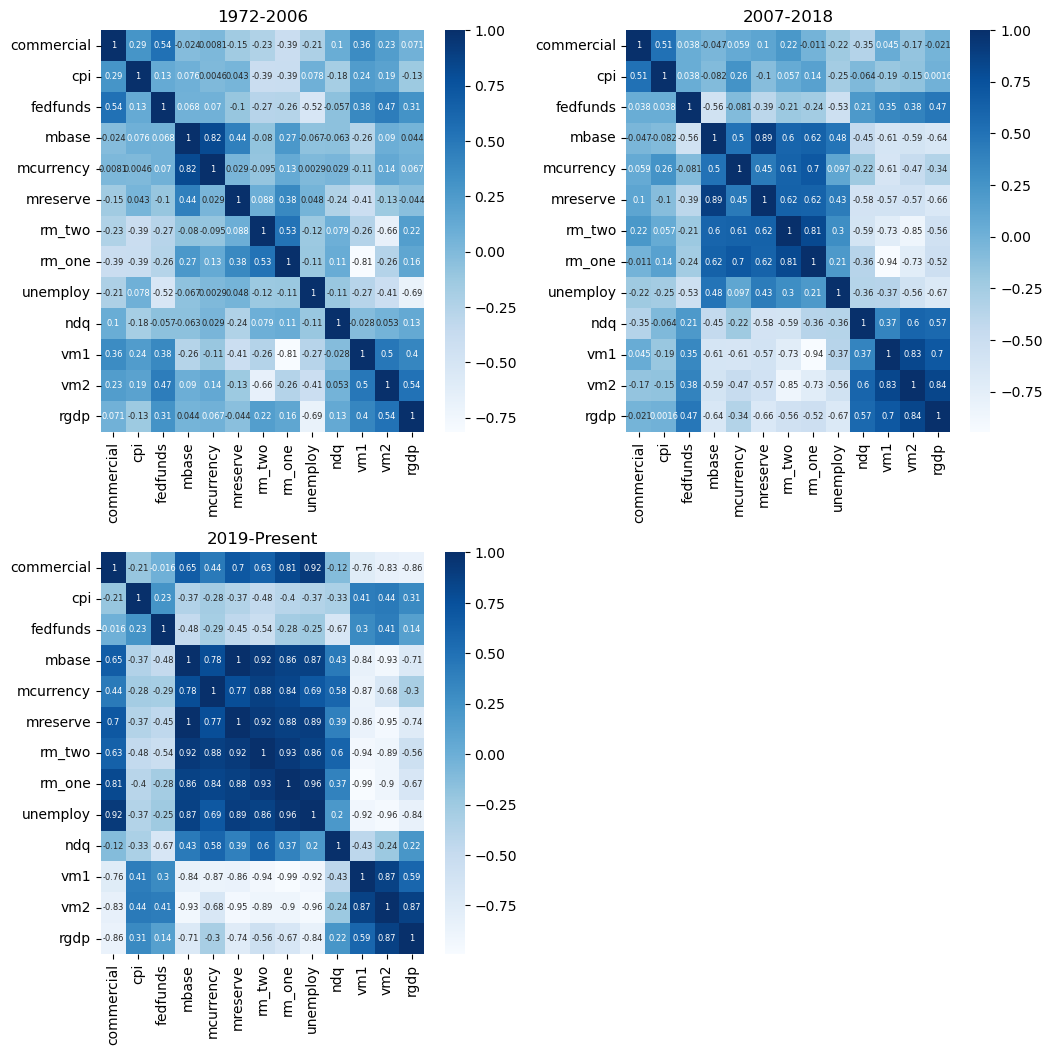

In [308]:
# create figure and subplots 
fig = plt.figure(figsize=(12,12))
axes_pre2007 = fig.add_subplot(2,2,1)
axes_post2007  = fig.add_subplot(2,2,2)
axes_present = fig.add_subplot(2,2,3)
# set titles for subplots 
axes_present.set_title('2019-Present')
axes_post2007.set_title('2007-2018')
axes_pre2007.set_title('1972-2006')
# create heatmaps 
sns.heatmap(ax=axes_pre2007, data=pre_2007_matrix, annot=True, annot_kws={'size':6}, cmap='Blues')
sns.heatmap(ax=axes_post2007, data=after_2007_matrix, annot=True, annot_kws={'size':6}, cmap='Blues')
sns.heatmap(ax=axes_present, data=present_matrix, annot=True, annot_kws={'size':6}, cmap='Blues')

plt.subplots_adjust(wspace=.3, hspace=.3)